<a href="https://colab.research.google.com/github/daybreaksocialcircles/groupcluster/blob/master/Connect_Me_Match5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Find Social Circle Connections
# Enter your record number below to view matching connections

In [0]:
import pandas_profiling as pp
import numpy as np
import pandas as pd
import io
import requests
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Ignore Jupyter Notebook python warnings
warnings.simplefilter('ignore')


In [0]:
# Read .csv from URL
url="https://raw.githubusercontent.com/daybreaksocialcircles/groupcluster/master/social_circles.csv"
df=pd.read_csv(url)

In [0]:
def compare_matches(connection1, connection2):
  
    # Display how connection1 is similar to connection2
    print('Matching', sc_array[connection1][0], ' to ', sc_array[connection2][0])
    
    # Set initial rank to a high value
    rank = 1000
    
    # Collect output into "matching"
    matching = pd.DataFrame(columns=['col_number', 'comment', 'interest', 'ranking'])
    
    merged_list = [[sc_array[0][i], sc_array[connection1][i], sc_array[connection2][i]] for i in range(0, len(sc_array[0]))]
    
    # Identify opposites, people who don't like smokers are unlikely to match with those who like smoking
    for i in range(42, 58):
        if sc_array[connection1][i] == "-1" and sc_array[connection2][i] == "1":
            print('Mismatch WARNING: ', sc_array[connection1][0], ' Avoids', sc_array[0][i], ' and ', sc_array[connection2][0], 'likes',  sc_array[0][i])
        if sc_array[connection1][i] == "1" and sc_array[connection2][i] == "-1":
            print('Mismatch WARNING: ', sc_array[connection2][0], ' Avoids', sc_array[0][i], ' and ', sc_array[connection1][0], 'likes',  sc_array[0][i])
        # print(sc_array[0][i], sc_array[connection1][i], sc_array[connection2][i])
        
    # Identify matching interests    
    for i in range(len(sc_array[0])):
        if sc_array[connection1][i] == sc_array[connection2][i] or ((sc_array[connection1][i] == '1' and sc_array[connection2][i] == '2') or (sc_array[connection1][i] == '2' and sc_array[connection2][i] == '1')):
            if sc_array[connection1][i] != '' and sc_array[connection1][i] != '0':
                # Display information for person being matched
                # print(i,sc_array[0][i],sc_array[connection2][i] )
                rank = 1000
                remark = 'none'
                # Interests (Columns 2 - 39)
                if i in range(2, 39):
                    rank = 10
                    remark = 'Likes'
                    #print(sc_array[0][i], sc_array[connection2][i])
                    if sc_array[connection2][i] == '1':
                        rank = 1
                        remark = 'Really Likes!'
                # Enjoys / Avoids (Columns 42 - 58)
                if i in range(42, 58):
                    #print(sc_array[0][i], sc_array[connection2][i])
                    if sc_array[connection2][i] != '0':
                        if sc_array[connection2][i] == '1':
                            rank = 20
                            remark = 'Enjoys'
                        else:
                            rank = 30
                            remark = 'Avoids'
                # Introverts (Columns 40 and 41)
                if i in [40, 41]: 
                    rank = 90
                    if sc_array[connection2][i] == '0':
                        remark = 'No'
                    elif sc_array[connection2][i]  == '0.5':
                        remark = 'Maybe'
                    else:
                        remark = 'Yes'
                    #remark = sc_array[connection2][i]
                # Wanting to make friends (Column 87)
                if i == 87:
                    rank = 200
                    matching.loc[200] = [200, 'Yes', 'Actively interested in making friends', 200]
                # Kids (Column 1 = Yes or No)
                if i == 1: 
                    rank = 100
                    remark = sc_array[connection2][i]
                    if remark == '1':
                        remark = 'Yes'
                        # Capture number of Daughters and ages
                        if sc_array[connection2][59] != '0':
                            if sc_array[connection1][59] != '0':
                                matching.loc[101] = [101, sc_array[connection2][59], 'Number of daughters       (Difference: %2s)' % (int(sc_array[connection2][59]) - int(sc_array[connection1][59])) , 101]
                                matching.loc[102] = [102, sc_array[connection2][60], 'Youngest daughter born in (Difference: %2s)' % (int(sc_array[connection2][60]) - int(sc_array[connection1][60])) , 102]
                                matching.loc[103] = [103, sc_array[connection2][61], 'Oldest daughter born in   (Difference: %2s)' % (int(sc_array[connection2][61]) - int(sc_array[connection1][61])), 103]
                            else:
                                matching.loc[101] = [101, sc_array[connection2][59], 'Number of daughters       (Boys Difference: %2s)' % (int(sc_array[connection2][59]) - int(sc_array[connection1][62])), 101]
                                matching.loc[102] = [102, sc_array[connection2][60], 'Youngest daughter born in (Boys Difference: %2s)' % (int(sc_array[connection2][60]) - int(sc_array[connection1][63])), 102]
                                matching.loc[103] = [103, sc_array[connection2][61], 'Oldest daughter born in   (Boys Difference: %2s)' % (int(sc_array[connection2][61]) - int(sc_array[connection1][64])), 103]
                        # Capture number of Sons and ages
                        if sc_array[connection2][62] != '0':
                            if sc_array[connection1][62] != '0':
                                matching.loc[104] = [104, sc_array[connection2][62], 'Number of sons        (Difference: %2s)' % (int(sc_array[connection2][62]) - int(sc_array[connection1][62])), 104]
                                matching.loc[105] = [105, sc_array[connection2][63], 'Youngest son born in  (Difference: %2s)' % (int(sc_array[connection2][63]) - int(sc_array[connection1][63])), 105]
                                matching.loc[106] = [106, sc_array[connection2][64], 'Oldest son born in    (Difference: %2s)' % (int(sc_array[connection2][64]) - int(sc_array[connection1][64])), 106]
                            else:
                                matching.loc[104] = [104, sc_array[connection2][62], 'Number of sons        (Girls Difference: %2s)' % (int(sc_array[connection2][62]) - int(sc_array[connection1][59])), 104]
                                matching.loc[105] = [105, sc_array[connection2][63], 'Youngest son born in  (Girls Difference: %2s)' % (int(sc_array[connection2][63]) - int(sc_array[connection1][60])), 105]
                                matching.loc[106] = [106, sc_array[connection2][64], 'Oldest son born in    (Girls Difference: %2s)' % (int(sc_array[connection2][64]) - int(sc_array[connection1][61])), 106]
                    else:
                        rank = 'No Kids'
                if rank not in [200, 1000]:
                    matching.loc[i] = [i, remark, sc_array[0][i], rank]
    output = matching.loc[:,['col_number', 'comment', 'interest', 'ranking']].sort_values(by=['ranking', 'col_number'])
    print(output.iloc[:, [2, 1]].to_string(index=False))
    print()




In [0]:

# Alternate Array formats for different analysis
url_source=requests.get(url).content 
hdf=pd.read_csv(io.StringIO(url_source.decode('utf-8')), header=None)
sc_array = np.array(hdf)

# Store the original column names in a python list
original_headers = list(df.columns.values)

# Remove all but the numeric columns
# Some analysis can only be performed on numeric data
ndf = df._get_numeric_data()

# Store the headers for all numeric columns in a list
numeric_headers = list(ndf.columns.values)

# Change NaN values to 0
NaNs_values = np.isnan(ndf)
ndf[NaNs_values] = 0
sc_matrix = pd.DataFrame.as_matrix(ndf)

# Create an array to store prediction values
predict_connection = np.zeros(len(sc_array),dtype=
                           [('record', int), ('interests', int), ('likes', int), ('daughters', int), ('sons', int)]
                          )

# Set the first column to the record number so that we can sort by predictions later and retain record number
for i in range(len(predict_connection)):
    predict_connection[i][0] = i+1

#Calculate values over just interests [ShortHikes...Anime]
predict_array = sc_matrix[0:,:38]
avoid_array = sc_matrix[0:,38:55]


In [0]:
def process_dropdown(connect_my_record):
    # Select a record with which to compare all other records for connections
    connection1 = connect_my_record - 1
    print('Original: ', sc_array[connect_my_record][0])
    compare_matches(connect_my_record,connect_my_record)
    for i in range(1,len(predict_array)):
        for j in range(len(predict_array[0])):
            predict_connection[i][1] += ( int(predict_array[i][j]) * int(predict_array[connection1][j]) ** 2 )
    for i in range(0,len(avoid_array)):
        for j in range(len(avoid_array[0])):
            if abs(int(avoid_array[i][j]) - int(avoid_array[connection1][j])) == 0:
                predict_connection[i][1] += 2
                #print(avoid_array[i][j], avoid_array[connection1][j], sc_array[connect_my_record][0], sc_array[i+1][0])
            if abs(int(avoid_array[i][j]) - int(avoid_array[connection1][j])) == 2:
                predict_connection[i][1] += -2
                #print('Mismatch', avoid_array[i][j], avoid_array[connection1][j], sc_array[connect_my_record][0], sc_array[i+1][0], j, sc_array[0][j+42])

    # Sort in descending order, highest matching score first
    predict_connection[::-1].sort(order='interests')

    print()
    predict_list=predict_connection[:5]['record'].tolist()
    for i in predict_list:
        print('Predictive Record Matched to: ',i)
        compare_matches(connect_my_record,i)

    return connect_my_record


In [18]:
# Select a record for analysis
# connect_my_record = 13

menui = df[['Surrogate_Key','Order']].values.tolist()
interact(process_dropdown, connect_my_record=menui);

interactive(children=(Dropdown(description='connect_my_record', options=(['1_Alabama_Alexander_City', 1], ['2_…

In [8]:
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

# Some analysis can only be performed on numeric data
cdf=pd.read_csv(url)
cndf = cdf._get_numeric_data()
cndf = cndf.iloc[:,:72]

# Store the headers for all numeric columns in a list
cnumeric_headers = list(cndf.columns.values)

# Change NaN values to 0
NaNs_values = np.isnan(cndf)
cndf[NaNs_values] = 0

#Initialize our scaler
scaler = StandardScaler()
#Scale each column in numer
cndf = pd.DataFrame(scaler.fit_transform(cndf))
# cndf.iloc[:8,59:64]

csc_matrix = pd.DataFrame.as_matrix(cndf)

# Define Cluster Model
cluster_model = KMeans(n_clusters=5, random_state=20)

# Fit the model to Social Circles Matrix
cluster_model.fit(csc_matrix)

# Display the cluster labels assigned to each record (15 clusters created = 0-14)
cluster_model.labels_

cluster_labels = cluster_model.fit_predict(csc_matrix)

# Add cluster labels to end of data frame
# cp = connection Predictions Data Frame with firend_cluster column appended to the right of array
cp=cdf
cp['connection_cluster'] = cluster_labels

# Find clusters of connections for '1_Alabama_Alexander_City'
# connect_my_record = 25


def process_dropdown_kmean(connect_my_record):
    # Select a record with which to compare all other records for connections
    connection1 = connect_my_record - 1
    print('Original: ', sc_array[connect_my_record][0])
    compare_matches(connect_my_record,connect_my_record)

    match_me = cp[cp.Surrogate_Key==sc_array[connect_my_record, 0]]
    # Label for cluster
    match_cluster_label = match_me['connection_cluster'].iat[0]

    print('Matching Cluster: ', match_cluster_label)
    # Print all records with the name cluster label
    abc = cp[cp.connection_cluster==match_cluster_label]
    cluster_list = list(abc.index)

    # Print cluster matches
    for i in cluster_list:
        print('Cluster Record Matched to: ',i+1,'(Index =',i,')')
        compare_matches(connect_my_record, i+1)

    return connect_my_record

interact(process_dropdown_kmean, connect_my_record=menui);


interactive(children=(Dropdown(description='connect_my_record', options=(['1_Alabama_Alexander_City', 1], ['2_…

In [0]:
#  Validate results
#
# Compare Fashion_Conscious (column index=48)
# With "15_Alabama_Enterpise"
#   Matches with 11, 15, 37, 52, 72, 76, 79, 105
# print(cp.iloc[:16, [0,48]])
# print(cp.iloc[:, [0,48]].sort_values(by='Fashion_Conscious',ascending=False))

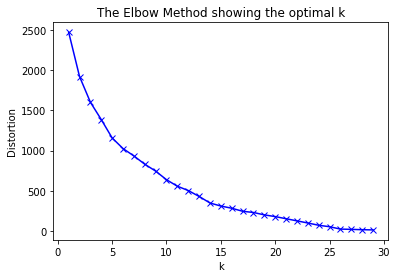

In [10]:
# Determine optimal values for K

# Meaningful clustering vs. groups are differentiated by less important factors

# https://www.udemy.com/clustering-classification-with-machine-learning-in-python/learn/lecture/9333372#overview
# Clustering & Classification With Machine Learning in Python

%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns

# k means determine k
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(sc_matrix)
    kmeanModel.fit(sc_matrix)
    distortions.append(sum(np.min(cdist(sc_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / sc_matrix.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
# Data Frame Groupings: Interests, Avoidances, Kids, Roles

interest_df = df.loc[:,['ShortHikes', 'LongHikes', 'Movies_TV', 'BookClub', 'GamesNight',
       'PokerNight', 'Films_Documentaries', 'CulturalEvents', 'PlayingSports',
       'WatchingSports', 'SnowSports', 'Running', 'ExerciseBudy', 'Biking',
       'Camping', 'Crafting', 'Geocaching', 'SinglesActivities',
       'Girls_GuysNightOut', 'KidsNightOut', 'SingleParents', 'FamilyFunNight',
       'IceCreamSocial', 'FoodieClub', 'WineAndCheese', 'PizzaNights',
       'SupperClub', 'ChocolateTasting', 'Karaoke', 'HolidayParties',
       'WaterFights', 'LAN_Gaming', 'CommunityService', 'Entrepreneurship',
       'RockHounding', 'MusicListening', 'JamSessions', 'Anime']]
avoid_df = df.loc[:, ['Restaurants', 'Bars', 'Libraries', 'Short_Walks', 'Smokers', 'Drinkers',
       'Fashion_Conscious', 'Religous_Discussions', 'Political_Discussions',
       'Liberal_Views', 'Conservative_Views', 'Thrifty_Activities',
       'Extravagant_Activities', 'Watching_Sports', 'Hanging_Out',
       'Big_Crowds', 'Loud_Crowds']]
kids_df = df.loc[:, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']]
roles_df = df.loc[:, ['Officer', 'Facebook', 'PlanEvent', 'ConnectPeople',
       'TechnicalHelp', 'Club_Board', 'Actively_making_friends',
       'Helping_others_connect']]
# kids_df[:10]

In [12]:

def compare_matches_kids(connection1, connection2):
    
    # Display how connection1 is similar to connection2
    print('Matching', sc_array[connection1][0], ' to ', sc_array[connection2][0])
    
    # Set initial rank to a high value
    rank = 1000
    
    # Collect output into "matching"
    matching = pd.DataFrame(columns=['col_number', 'comment', 'interest', 'ranking'])
    
    merged_list = [[sc_array[0][i], sc_array[connection1][i], sc_array[connection2][i]] for i in range(0, len(sc_array[0]))]
    
    # Identify opposites, people who don't like smokers are unlikely to match with those who like smoking
    for i in range(42, 58):
        if sc_array[connection1][i] == "-1" and sc_array[connection2][i] == "1":
            print('Mismatch WARNING: ', sc_array[connection1][0], ' Avoids', sc_array[0][i], ' and ', sc_array[connection2][0], 'likes',  sc_array[0][i])
        if sc_array[connection1][i] == "1" and sc_array[connection2][i] == "-1":
            print('Mismatch WARNING: ', sc_array[connection2][0], ' Avoids', sc_array[0][i], ' and ', sc_array[connection1][0], 'likes',  sc_array[0][i])
        # print(sc_array[0][i], sc_array[connection1][i], sc_array[connection2][i])
        
    # Identify matching interests    
    for i in range(len(sc_array[0])):
        if sc_array[connection1][i] == sc_array[connection2][i] or ((sc_array[connection1][i] == '1' and sc_array[connection2][i] == '2') or (sc_array[connection1][i] == '2' and sc_array[connection2][i] == '1')):
            if sc_array[connection1][i] != '' and sc_array[connection1][i] != '0':
                # Display information for person being matched
                # print(i,sc_array[0][i],sc_array[connection2][i] )
                rank = 1000
                remark = 'none'
                # Interests (Columns 2 - 39)
                if i in range(2, 39):
                    rank = 10
                    remark = 'Likes'
                    #print(sc_array[0][i], sc_array[connection2][i])
                    if sc_array[connection2][i] == '1':
                        rank = 1
                        remark = 'Really Likes!'
                # Enjoys / Avoids (Columns 42 - 58)
                if i in range(42, 58):
                    #print(sc_array[0][i], sc_array[connection2][i])
                    if sc_array[connection2][i] != '0':
                        if sc_array[connection2][i] == '1':
                            rank = 20
                            remark = 'Enjoys'
                        else:
                            rank = 30
                            remark = 'Avoids'
                # Introverts (Columns 40 and 41)
                if i in [40, 41]: 
                    rank = 90
                    if sc_array[connection2][i] == '0':
                        remark = 'No'
                    elif sc_array[connection2][i]  == '0.5':
                        remark = 'Maybe'
                    else:
                        remark = 'Yes'
                    #remark = sc_array[connection2][i]
                # Wanting to make friends (Column 87)
                if i == 87:
                    rank = 200
                    matching.loc[200] = [200, 'Yes', 'Actively interested in making friends', 200]
                # Kids (Column 1 = Yes or No)
                if i == 1: 
                    rank = 100
                    remark = sc_array[connection2][i]
                    if remark == '1':
                        remark = 'Yes'
                        # Capture number of Daughters and ages
                        if sc_array[connection2][59] != '0':
                            if sc_array[connection1][59] != '0':
                                matching.loc[101] = [101, sc_array[connection2][59], 'Number of daughters       (Difference: %2s)' % (int(sc_array[connection2][59]) - int(sc_array[connection1][59])) , 101]
                                matching.loc[102] = [102, sc_array[connection2][60], 'Youngest daughter born in (Difference: %2s)' % (int(sc_array[connection2][60]) - int(sc_array[connection1][60])) , 102]
                                matching.loc[103] = [103, sc_array[connection2][61], 'Oldest daughter born in   (Difference: %2s)' % (int(sc_array[connection2][61]) - int(sc_array[connection1][61])), 103]
                            else:
                                matching.loc[101] = [101, sc_array[connection2][59], 'Number of daughters       (Boys Difference: %2s)' % (int(sc_array[connection2][59]) - int(sc_array[connection1][62])), 101]
                                matching.loc[102] = [102, sc_array[connection2][60], 'Youngest daughter born in (Boys Difference: %2s)' % (int(sc_array[connection2][60]) - int(sc_array[connection1][63])), 102]
                                matching.loc[103] = [103, sc_array[connection2][61], 'Oldest daughter born in   (Boys Difference: %2s)' % (int(sc_array[connection2][61]) - int(sc_array[connection1][64])), 103]
                        # Capture number of Sons and ages
                        if sc_array[connection2][62] != '0':
                            if sc_array[connection1][62] != '0':
                                matching.loc[104] = [104, sc_array[connection2][62], 'Number of sons        (Difference: %2s)' % (int(sc_array[connection2][62]) - int(sc_array[connection1][62])), 104]
                                matching.loc[105] = [105, sc_array[connection2][63], 'Youngest son born in  (Difference: %2s)' % (int(sc_array[connection2][63]) - int(sc_array[connection1][63])), 105]
                                matching.loc[106] = [106, sc_array[connection2][64], 'Oldest son born in    (Difference: %2s)' % (int(sc_array[connection2][64]) - int(sc_array[connection1][64])), 106]
                            else:
                                matching.loc[104] = [104, sc_array[connection2][62], 'Number of sons        (Girls Difference: %2s)' % (int(sc_array[connection2][62]) - int(sc_array[connection1][59])), 104]
                                matching.loc[105] = [105, sc_array[connection2][63], 'Youngest son born in  (Girls Difference: %2s)' % (int(sc_array[connection2][63]) - int(sc_array[connection1][60])), 105]
                                matching.loc[106] = [106, sc_array[connection2][64], 'Oldest son born in    (Girls Difference: %2s)' % (int(sc_array[connection2][64]) - int(sc_array[connection1][61])), 106]
                    else:
                        rank = 'No Kids'
                if rank not in [200, 1000]:
                    matching.loc[i] = [i, remark, sc_array[0][i], rank]
    output = matching.loc[:,['col_number', 'comment', 'interest', 'ranking']].sort_values(by=['ranking', 'col_number'])
    print(output.iloc[:, [2, 1]].to_string(index=False))
    print()



# Select a record with which to compare all other records for connections
connection1 = 25 - 1

# Create an array to store prediction values
predict_connection = np.zeros(len(sc_array),dtype=
                           [('record', int), ('interests', int), ('likes', int), ('girls', int), ('boys', int)]
                          )

# Set the first column to the record number so that we can sort by predictions later and retain record number
for i in range(len(predict_connection)):
    predict_connection[i][0] = i+1

   
#Calculate values over just interests [ShortHikes...Anime]
predict_array = sc_matrix[0:,:38]
avoid_array = sc_matrix[0:,38:55]

connect_my_record = 17 - 1
# Indexes of sample records
    # 25 = 6 older kids
    # 22 = 4 kids
    # 31 = Steven and Anna
    # 29 = 3 boys
    # 105 = 1 boy
    # 18 = 3 girls
    # 43 = 1 girl
    # 3 = no kids
    
kids_df = df.loc[:, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']]
#print(kids_df)
for i in range(len(predict_connection)):
    predict_connection[i][3] = 1000
    
print('Original: ', kids_df.loc[connect_my_record][0])
compare_matches(connect_my_record+1,connect_my_record+1)
print()

orig_kid_count = int(kids_df.loc[connect_my_record]['Num_Daughters']) + int(kids_df.loc[connect_my_record]['Num_Sons'])
if orig_kid_count == 0:
    print('Original has no Kids')
else:
    for i in range(1,len(kids_df)):
        i_kid_count = int(kids_df.loc[i]['Num_Daughters']) + int(kids_df.loc[i]['Num_Sons'])
        # Does the connection have no kids?
        if i_kid_count != 0:
            predict_connection[i][3] = 0
            predict_connection[i][3] += abs(orig_kid_count - i_kid_count)
    
            predict_connection[i][3] += abs(int(kids_df.loc[i]['Num_Daughters']) - int(kids_df.loc[connect_my_record]['Num_Daughters']))
            # The match has daughters
            if int(kids_df.loc[i]['Num_Daughters']) != 0:
                if int(kids_df.loc[connect_my_record]['Num_Daughters']) == 0:
                    # The original did not have daughters
                    predict_connection[i][3] += 40
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Daugthers']) - int(kids_df.loc[connect_my_record]['Min_Sons'])) ** 2
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Daughters']) - int(kids_df.loc[connect_my_record]['Max_Sons'])) ** 2
                else:
                    # Exponentially add the differences in ages
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Daugthers']) - int(kids_df.loc[connect_my_record]['Min_Daugthers'])) ** 2
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Daughters']) - int(kids_df.loc[connect_my_record]['Max_Daughters'])) ** 2
            else: 
                # The match does not have daughters
                if int(kids_df.loc[connect_my_record]['Num_Daughters']) != 0:
                    # Would be better if they had daughters
                    predict_connection[i][3] += 20
                else:
                    # Neither have daughters
                    predict_connection[i][3] += 0
                    
            predict_connection[i][3] += abs(int(kids_df.loc[i]['Num_Sons']) - int(kids_df.loc[connect_my_record]['Num_Sons']))
            if int(kids_df.loc[i]['Num_Sons']) != 0:
                if int(kids_df.loc[connect_my_record]['Num_Sons']) == 0:
                    predict_connection[i][3] += 40
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Sons']) - int(kids_df.loc[connect_my_record]['Min_Daughters'])) ** 2
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Sons']) - int(kids_df.loc[connect_my_record]['Max_Daughters'])) ** 2
                else:
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Sons']) - int(kids_df.loc[connect_my_record]['Min_Sons'])) ** 2
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Sons']) - int(kids_df.loc[connect_my_record]['Max_Sons'])) ** 2
            else:
                if int(kids_df.loc[connect_my_record]['Num_Sons']) != 0:
                        predict_connection[i][3] += 20
                else:
                    # Neither have sons
                    predict_connection[i][3] += 0        #print(int(kids_df.loc[i]['Num_Daughters']),int(kids_df.loc[i]['Min_Daugthers']),int(kids_df.loc[i]['Max_Daughters']))
        #print(int(kids_df.loc[i]['Num_Sons']),int(kids_df.loc[i]['Min_Sons']),int(kids_df.loc[i]['Max_Sons']))
        #print(predict_connection[i][3])
        #print()
# Sort in descending order, highest matching score first
predict_connection[::1]

print()
kid_predict_df = pd.DataFrame(columns=['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons'])
predict_list=predict_connection[:20]['record'].tolist()
j = 0
for i in predict_list:
    # print(df.loc[i-1, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']])
    j += 1
    kid_predict_df.loc[j, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']] = df.loc[i-1, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']]
    
predict_list=predict_connection[:10]['record'].tolist()
for i in predict_list:
    print('Predictive Record Matched to: ',i)
    compare_matches_kids(connect_my_record+1,i)



Original:  17_Alabama_Florence
Matching 17_Alabama_Florence  to  17_Alabama_Florence
                                   interest        comment
                                  Movies_TV  Really Likes!
                                 GamesNight  Really Likes!
                             CulturalEvents  Really Likes!
                             WatchingSports  Really Likes!
                                    Camping  Really Likes!
                         Girls_GuysNightOut  Really Likes!
                               KidsNightOut  Really Likes!
                             FamilyFunNight  Really Likes!
                                 FoodieClub  Really Likes!
                                 SupperClub  Really Likes!
                           ChocolateTasting  Really Likes!
                             HolidayParties  Really Likes!
                                WaterFights  Really Likes!
                             MusicListening  Really Likes!
                              

In [13]:
compare_matches_kids(6,10)

Matching 6_Alabama_Auburn  to  10_Alabama_Clanton
             interest        comment
           FoodieClub  Really Likes!
        WineAndCheese  Really Likes!
       HolidayParties  Really Likes!
       MusicListening  Really Likes!
             BookClub          Likes
       CulturalEvents          Likes
          Restaurants         Enjoys
                 Bars         Enjoys
          Short_Walks         Enjoys
             Drinkers         Enjoys
   Thrifty_Activities         Enjoys
          Hanging_Out         Enjoys
           Big_Crowds         Enjoys
 Religous_Discussions         Avoids
        Liberal_Views         Avoids



In [14]:
print('Matching Daughters sorted')
kid_predict_df.sort_values(by=['Num_Daughters','Min_Daugthers','Max_Daughters'],ascending=False)

Matching Daughters sorted


,Surrogate_Key,Num_Daughters,Min_Daugthers,Max_Daughters,Num_Sons,Min_Sons,Max_Sons
18,18_Alabama_Fort_Payne,3,2001,2011,0,0,0
20,20_Alabama_Greenville,2,2012,2015,0,0,0
4,4_Alabama_Athens,2,2004,2007,1,2001,2001
10,10_Alabama_Clanton,2,2001,2010,2,2001,2010
9,9_Alabama_Chickasaw,1,2017,2017,1,2015,2015
15,15_Alabama_Enterprise,1,2017,2017,1,2015,2015
2,2_Alabama_Andalusia,1,2010,2010,0,0,0
8,8_Alabama_Birmingham,1,2008,2008,0,0,0
17,17_Alabama_Florence,1,2004,2004,2,2002,2013
19,19_Alabama_Gadsden,1,1990,1990,1,1984,1984


In [15]:
print('Matching Sons sorted')
kid_predict_df.sort_values(by=['Num_Sons','Min_Sons','Max_Sons'],ascending=False)

Matching Sons sorted


,Surrogate_Key,Num_Daughters,Min_Daugthers,Max_Daughters,Num_Sons,Min_Sons,Max_Sons
16,16_Alabama_Eufaula,0,0,0,3,2005,2011
1,1_Alabama_Alexander_City,0,0,0,2,2005,2010
17,17_Alabama_Florence,1,2004,2004,2,2002,2013
10,10_Alabama_Clanton,2,2001,2010,2,2001,2010
5,5_Alabama_Atmore,0,0,0,2,2000,2008
13,13_Alabama_Demopolis,0,0,0,1,2016,2016
9,9_Alabama_Chickasaw,1,2017,2017,1,2015,2015
11,11_Alabama_Cullman,0,0,0,1,2015,2015
15,15_Alabama_Enterprise,1,2017,2017,1,2015,2015
4,4_Alabama_Athens,2,2004,2007,1,2001,2001


In [0]:

def process_dropdown_kids(connect_my_record):
    # Select a record with which to compare all other records for connections
    connect_my_record = connect_my_record - 1
    print('Original: ', sc_array[connect_my_record+1][0])
    compare_matches(connect_my_record+1,connect_my_record+1)
    print()

    # Create an array to store prediction values
    predict_connection = np.zeros(len(sc_array),dtype=
                               [('record', int), ('interests', int), ('likes', int), ('girls', int), ('boys', int)]
                              )
    # Set the first column to the record number so that we can sort by predictions later and retain record number
    for i in range(len(predict_connection)):
        predict_connection[i][0] = i+1

    #Calculate values over just interests [ShortHikes...Anime]
    predict_array = sc_matrix[0:,:38]
    avoid_array = sc_matrix[0:,38:55]


    kids_df = df.loc[:, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']]
    #print(kids_df)
    for i in range(len(predict_connection)):
        predict_connection[i][3] = 1000

    print('Original: ', kids_df.loc[connect_my_record][0])
    compare_matches(connect_my_record,connect_my_record)
    print()

    orig_kid_count = int(kids_df.loc[connect_my_record]['Num_Daughters']) + int(kids_df.loc[connect_my_record]['Num_Sons'])
    if orig_kid_count == 0:
        print('Original has no Kids')
    else:
        for i in range(1,len(kids_df)):
            i_kid_count = int(kids_df.loc[i]['Num_Daughters']) + int(kids_df.loc[i]['Num_Sons'])
            # Does the connection have no kids?
            if i_kid_count != 0:
                predict_connection[i][3] = 0
                predict_connection[i][3] += abs(orig_kid_count - i_kid_count)

                predict_connection[i][3] += abs(int(kids_df.loc[i]['Num_Daughters']) - int(kids_df.loc[connect_my_record]['Num_Daughters']))
                # The match has daughters
                if int(kids_df.loc[i]['Num_Daughters']) != 0:
                    if int(kids_df.loc[connect_my_record]['Num_Daughters']) == 0:
                        # The original did not have daughters
                        predict_connection[i][3] += 40
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Daugthers']) - int(kids_df.loc[connect_my_record]['Min_Sons'])) ** 2
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Daughters']) - int(kids_df.loc[connect_my_record]['Max_Sons'])) ** 2
                    else:
                        # Exponentially add the differences in ages
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Daugthers']) - int(kids_df.loc[connect_my_record]['Min_Daugthers'])) ** 2
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Daughters']) - int(kids_df.loc[connect_my_record]['Max_Daughters'])) ** 2
                else: 
                    # The match does not have daughters
                    if int(kids_df.loc[connect_my_record]['Num_Daughters']) != 0:
                        # Would be better if they had daughters
                        predict_connection[i][3] += 20
                    else:
                        # Neither have daughters
                        predict_connection[i][3] += 0

                predict_connection[i][3] += abs(int(kids_df.loc[i]['Num_Sons']) - int(kids_df.loc[connect_my_record]['Num_Sons']))
                if int(kids_df.loc[i]['Num_Sons']) != 0:
                    if int(kids_df.loc[connect_my_record]['Num_Sons']) == 0:
                        predict_connection[i][3] += 40
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Sons']) - int(kids_df.loc[connect_my_record]['Min_Daughters'])) ** 2
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Sons']) - int(kids_df.loc[connect_my_record]['Max_Daughters'])) ** 2
                    else:
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Sons']) - int(kids_df.loc[connect_my_record]['Min_Sons'])) ** 2
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Sons']) - int(kids_df.loc[connect_my_record]['Max_Sons'])) ** 2
                else:
                    if int(kids_df.loc[connect_my_record]['Num_Sons']) != 0:
                            predict_connection[i][3] += 20
                    else:
                        # Neither have sons
                        predict_connection[i][3] += 0        #print(int(kids_df.loc[i]['Num_Daughters']),int(kids_df.loc[i]['Min_Daugthers']),int(kids_df.loc[i]['Max_Daughters']))
            #print(int(kids_df.loc[i]['Num_Sons']),int(kids_df.loc[i]['Min_Sons']),int(kids_df.loc[i]['Max_Sons']))
            #print(predict_connection[i][3])
            #print()
    
    # Sort in descending order, highest matching score first
    predict_connection[::1]

    print()
    kid_predict_df = pd.DataFrame(columns=['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons'])
    predict_list=predict_connection[:10]['record'].tolist()
    j = 0
    for i in predict_list:
        # print(df.loc[i-1, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']])
        j += 1
        kid_predict_df.loc[j, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']] = df.loc[i-1, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']]

    predict_list=predict_connection[:20]['record'].tolist()
    for i in predict_list:
        print('Predictive Record Matched to: ',i)
        compare_matches_kids(connect_my_record+1,i)

    return connect_my_record


In [17]:

interact(process_dropdown_kids, connect_my_record=menui);

    # Indexes of sample records
        # 25 = 6 older kids
        # 22 = 4 kids
        # 31 = Steven and Anna
        # 29 = 3 boys
        # 105 = 1 boy
        # 18 = 3 girls
        # 43 = 1 girl
        # 3 = no kids


interactive(children=(Dropdown(description='connect_my_record', options=(['1_Alabama_Alexander_City', 1], ['2_…